# Customer Segmentation and Analysis 
### Steps to solve the problem :
1. Importing Libraries.
2. Exploration of data.
3. Data Visualization.
4. Clustering using K-Means.
5. Selection of Clusters.
6. Ploting the Cluster Boundry and Clusters.
7. 3D Plot of Clusters.

## Importing Libraries.

In [ ]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt 
import seaborn as sns 
import plotly as py
import plotly.graph_objs as go
import plotly.express as px
from sklearn.cluster import KMeans
import warnings
import os
warnings.filterwarnings("ignore")
py.offline.init_notebook_mode(connected = True)
#print(os.listdir("../input"))

## Data Exploration

In [ ]:
df = pd.read_csv(r'/content/Mall_Customers1.csv')
df.head()

,Unnamed: 0,customer_id,Gender,products_ordered,average_return_rate,total_spending
0,0,1000661.0,MALE,1,0.0,260.0
1,1,1001914.0,FEMALE,1,0.0,79.2
2,2,1002167.0,MALE,3,0.0,234.2
3,3,1002387.0,FEMALE,1,0.0,89.0
4,4,1002419.0,FEMALE,2,0.0,103.0


In [ ]:
df.shape

(24874, 6)

In [ ]:
df.describe()

,Unnamed: 0,customer_id,products_ordered,average_return_rate,total_spending
count,24874.000000,2.487400e+04,24874.000000,24874.000000,24874.000000
mean,12436.500000,6.566304e+11,1.741176,0.001039,191.245288
std,7180.649634,6.560350e+12,1.088303,0.027044,171.100082
min,0.000000,1.000661e+06,1.000000,0.000000,0.000000
25%,6218.250000,3.296314e+06,1.000000,0.000000,89.000000
50%,12436.500000,5.578172e+06,1.000000,0.000000,142.400000
75%,18654.750000,7.845900e+06,2.000000,0.000000,237.000000
max,24873.000000,9.954990e+13,13.000000,1.000000,3131.700000


In [ ]:
df.dtypes

Unnamed: 0               int64
customer_id            float64
Gender                  object
products_ordered         int64
average_return_rate    float64
total_spending         float64
dtype: object

In [ ]:
df.isnull().sum()

Unnamed: 0             0
customer_id            0
Gender                 0
products_ordered       0
average_return_rate    0
total_spending         0
dtype: int64

## Data Visualization

In [ ]:
plt.style.use('fivethirtyeight')

### Histograms

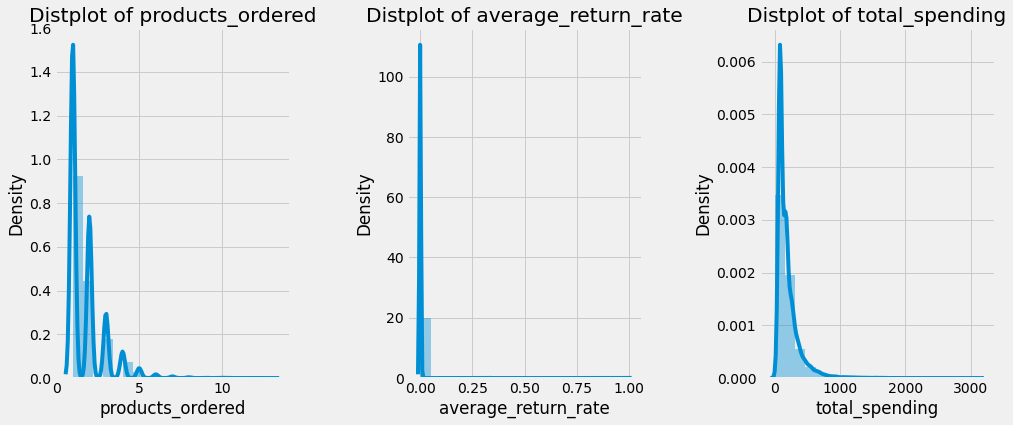

<Figure size 432x288 with 0 Axes>

In [ ]:
plt.figure(1 , figsize = (15 , 6))
n = 0 
for x in ['products_ordered' , 'average_return_rate' , 'total_spending']:
    n += 1
    plt.subplot(1 , 3 , n)
    plt.subplots_adjust(hspace =0.5 , wspace = 0.5)
    sns.distplot(df[x] , bins = 20)
    plt.title('Distplot of {}'.format(x))
plt.show()
# plt.savefig("without_log_transform.png")

### Count Plot of Gender

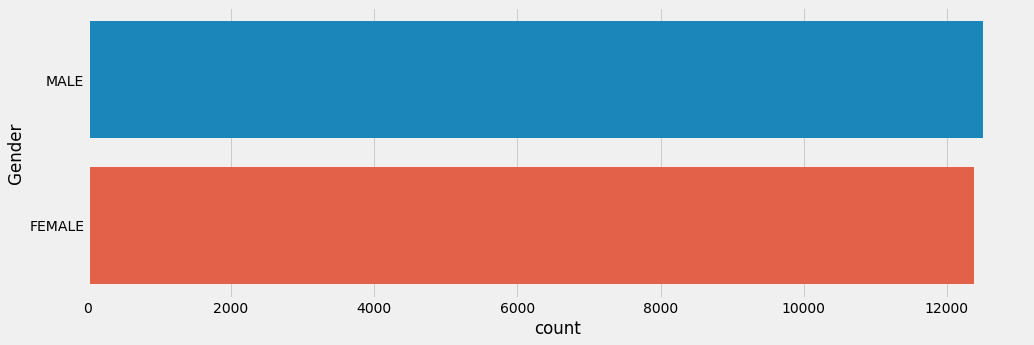

In [ ]:
plt.figure(1 , figsize = (15 , 5))
sns.countplot(y = 'Gender' , data = df)
plt.show()

### Ploting the Relation between Product Ordered , Average Return Rate and Total Spending

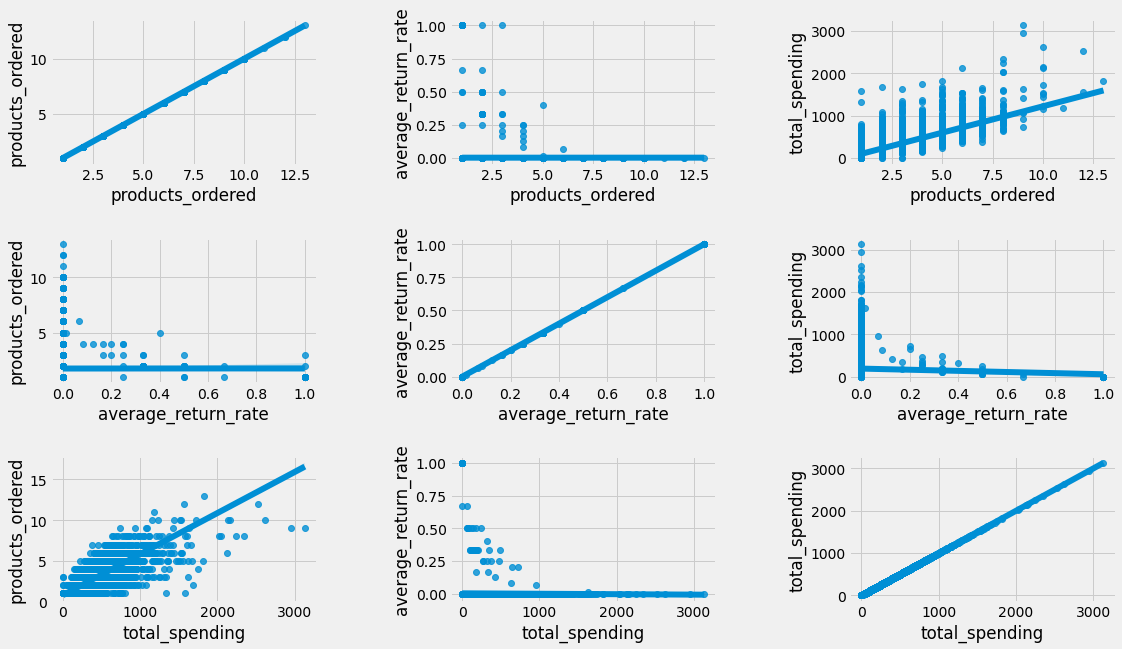

<Figure size 432x288 with 0 Axes>

In [ ]:
plt.figure(1 , figsize = (17 , 10))
n = 0 
for x in ['products_ordered' , 'average_return_rate' , 'total_spending']:
    for y in ['products_ordered' , 'average_return_rate' , 'total_spending']:
        n += 1
        plt.subplot(3 , 3 , n)
        plt.subplots_adjust(hspace = 0.5 , wspace = 0.5)
        sns.regplot(x = x , y = y , data = df)
        plt.ylabel(y.split()[0]+' '+y.split()[1] if len(y.split()) > 1 else y )
plt.show()
plt.savefig("dataset.png")

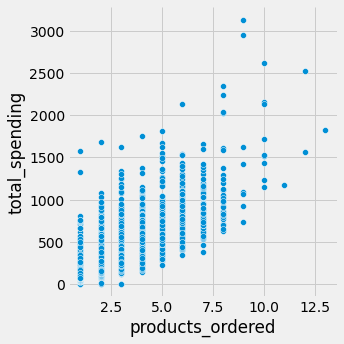

In [ ]:
sns.relplot(x="products_ordered", y="total_spending", data=df)

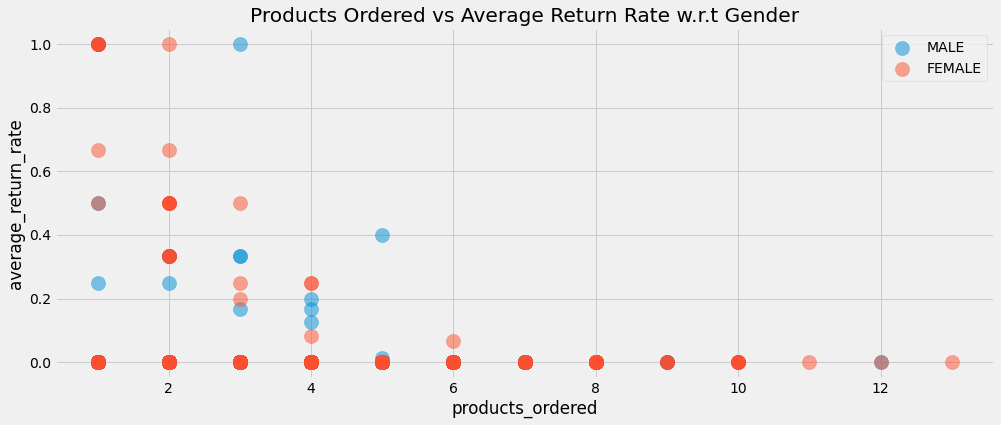

In [ ]:
plt.figure(1 , figsize = (15 , 6))
for gender in ['MALE' , 'FEMALE']:
    plt.scatter(x = 'products_ordered' , y = 'average_return_rate' , data = df[df['Gender'] == gender] ,
                s = 200 , alpha = 0.5 , label = gender)
plt.xlabel('products_ordered'), plt.ylabel('average_return_rate') 
plt.title('Products Ordered vs Average Return Rate w.r.t Gender')
plt.legend()
plt.show()

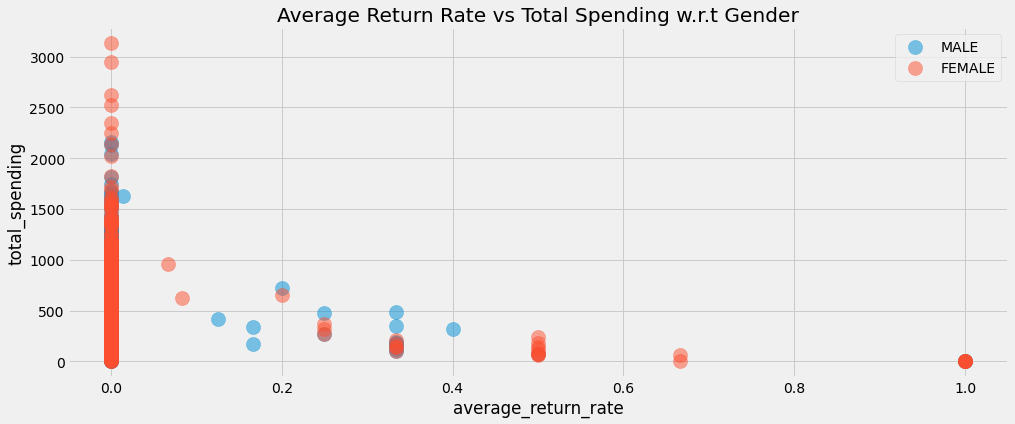

In [ ]:
plt.figure(1 , figsize = (15 , 6))
for gender in ['MALE' , 'FEMALE']:
    plt.scatter(x = 'average_return_rate',y = 'total_spending' ,
                data = df[df['Gender'] == gender] ,s = 200 , alpha = 0.5 , label = gender)
plt.xlabel('average_return_rate'), plt.ylabel('total_spending') 
plt.title('Average Return Rate vs Total Spending w.r.t Gender')
plt.legend()
plt.show()

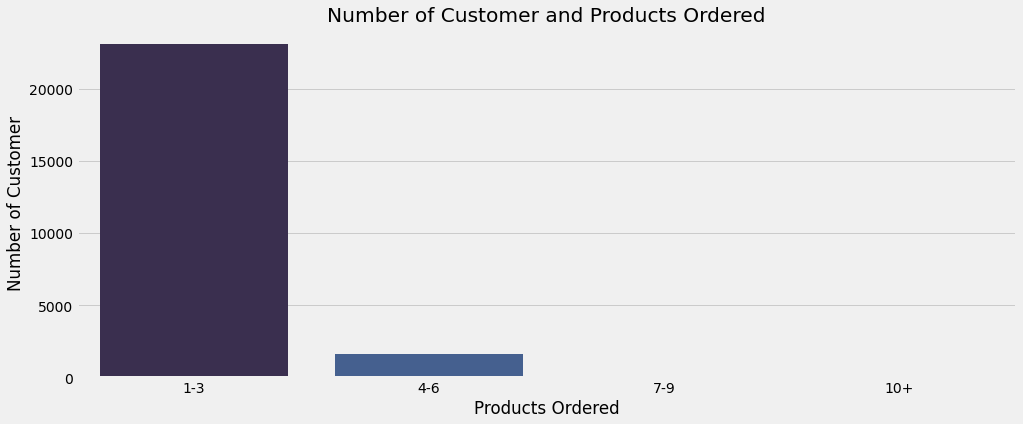

In [ ]:
PO_1_3 = df.products_ordered[(df.products_ordered>=1)&(df.products_ordered<=3)]
PO_4_6 = df.products_ordered[(df.products_ordered>=4)&(df.products_ordered<=6)]
PO_7_9 = df.products_ordered[(df.products_ordered>=7)&(df.products_ordered<=9)]
PO_10above = df.products_ordered[(df.products_ordered>=10)]

PO_x = ["1-3","4-6","7-9","10+"]
PO_y = [len(PO_1_3.values),len(PO_4_6.values),len(PO_7_9.values),len(PO_10above.values)]


plt.figure(figsize=(15,6))
sns.barplot(x=PO_x, y=PO_y, palette="mako")
plt.title("Number of Customer and Products Ordered")
plt.xlabel("Products Ordered")
plt.ylabel("Number of Customer")
plt.show()

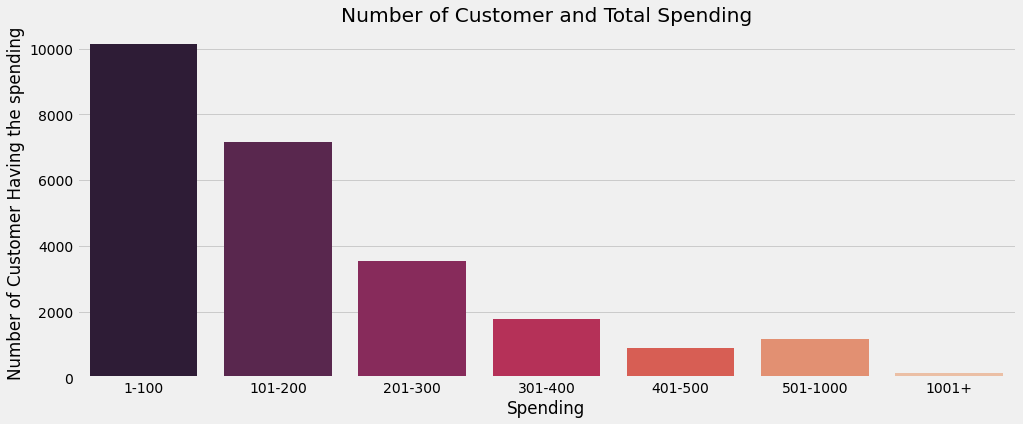

In [ ]:
ss_1_100 = df["total_spending"][(df["total_spending"]>=1) & (df["total_spending"]<=100)]
ss_101_200= df["total_spending"][(df["total_spending"]>=101) & (df["total_spending"]<=200)]
ss_201_300 = df["total_spending"][(df["total_spending"]>=201) & (df["total_spending"]<=300)]
ss_301_400 = df["total_spending"][(df["total_spending"]>=301) & (df["total_spending"]<=400)]
ss_401_500 = df["total_spending"][(df["total_spending"]>=401) & (df["total_spending"]<=500)]
ss_501_1000 = df["total_spending"][(df["total_spending"]>=501) & (df["total_spending"]<=1000)]
ss_1001above = df["total_spending"][(df["total_spending"]>=1001)]

ssx= ["1-100", "101-200", "201-300", "301-400", "401-500", "501-1000", "1001+"]
ssy= [len(ss_1_100.values), len(ss_101_200.values), len(ss_201_300.values), len(ss_301_400.values),len(ss_401_500.values), len(ss_501_1000.values),len(ss_1001above.values)]

plt.figure(figsize=(15,6))
sns.barplot(x=ssx, y=ssy, palette="rocket")
plt.title("Number of Customer and Total Spending")
plt.xlabel("Spending")
plt.ylabel("Number of Customer Having the spending")
plt.show()

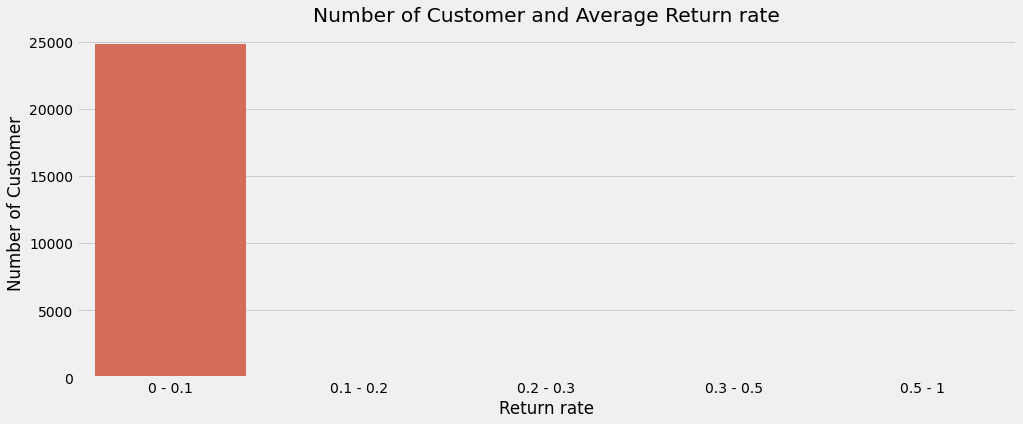

In [ ]:
rt0_0p1 = df["average_return_rate"][(df["average_return_rate"] >= 0) & (df["average_return_rate"] <= 0.1)]
rt0p1_0p2 = df["average_return_rate"][(df["average_return_rate"] > 0.1) & (df["average_return_rate"] <= 0.2)]
rt0p2_0p3 = df["average_return_rate"][(df["average_return_rate"] > 0.2) & (df["average_return_rate"] <= 0.3)]
rt0p3_0p5 = df["average_return_rate"][(df["average_return_rate"] > 0.3) & (df["average_return_rate"] <= 0.5)]
rt0p5_1 = df["average_return_rate"][(df["average_return_rate"] > 0.5) & (df["average_return_rate"] <= 1)]

rtx = ["0 - 0.1", "0.1 - 0.2", "0.2 - 0.3", "0.3 - 0.5", "0.5 - 1"]
rty = [len(rt0_0p1.values), len(rt0p1_0p2.values), len(rt0p2_0p3.values), len(rt0p3_0p5.values),len(rt0p5_1.values)]

plt.figure(figsize=(15,6))
sns.barplot(x=rtx, y=rty, palette= "Spectral")
plt.title("Number of Customer and Average Return rate")
plt.xlabel("Return rate")
plt.ylabel("Number of Customer")
plt.show()

In [ ]:
rtx,rty

(['0 - 0.1', '0.1 - 0.2', '0.2 - 0.3', '0.3 - 0.5', '0.5 - 1'],
 [24826, 5, 5, 23, 15])

#log1p transformation


In [ ]:
def apply_log1p_transformation(dataframe, column):
    '''This function takes a dataframe and a column in the string format
    then applies numpy log1p transformation to the column
    as a result returns log1p applied pandas series'''
    
    dataframe["log_" + column] = np.log1p(dataframe[column])
    return dataframe["log_" + column]

In [ ]:
apply_log1p_transformation(df, "products_ordered")
apply_log1p_transformation(df, "average_return_rate")
apply_log1p_transformation(df, "total_spending")

0        5.564520
1        4.384524
2        5.460436
3        4.499810
4        4.644391
           ...   
24869    5.560682
24870    5.495117
24871    4.499810
24872    5.590987
24873    4.174387
Name: log_total_spending, Length: 24874, dtype: float64

In [ ]:
df.describe()

,Unnamed: 0,customer_id,products_ordered,average_return_rate,total_spending,log_products_ordered,log_average_return_rate,log_total_spending
count,24874.000000,2.487400e+04,24874.000000,24874.000000,24874.000000,24874.000000,24874.000000,24874.000000
mean,12436.500000,6.566304e+11,1.741176,0.001039,191.245288,0.948418,0.000797,4.997756
std,7180.649634,6.560350e+12,1.088303,0.027044,171.100082,0.326843,0.019858,0.696175
min,0.000000,1.000661e+06,1.000000,0.000000,0.000000,0.693147,0.000000,0.000000
25%,6218.250000,3.296314e+06,1.000000,0.000000,89.000000,0.693147,0.000000,4.499810
50%,12436.500000,5.578172e+06,1.000000,0.000000,142.400000,0.693147,0.000000,4.965638
75%,18654.750000,7.845900e+06,2.000000,0.000000,237.000000,1.098612,0.000000,5.472271
max,24873.000000,9.954990e+13,13.000000,1.000000,3131.700000,2.639057,0.693147,8.049651


#Visualize log transformation applied features

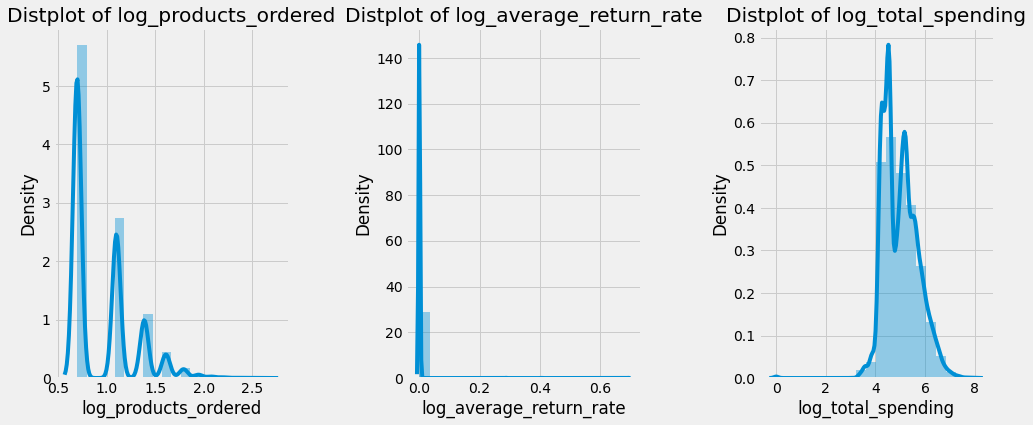

<Figure size 432x288 with 0 Axes>

In [ ]:
plt.figure(1 , figsize = (15 , 6))
n = 0 
for x in ['log_products_ordered' , 'log_average_return_rate' , 'log_total_spending']:
    n += 1
    plt.subplot(1 , 3 , n)
    plt.subplots_adjust(hspace =0.5 , wspace = 0.5)
    sns.distplot(df[x] , bins = 20)
    plt.title('Distplot of {}'.format(x))
plt.show()
plt.savefig('with_log_transform.jpg')

## Clustering using K- means


### 1.Segmentation using Product Ordered and Total Spending

In [ ]:
'''product ordered and total spending'''
X1 = df[['log_products_ordered' , 'log_total_spending']].iloc[: , :].values
inertia = []
for n in range(1 , 15):
    algorithm = (KMeans(n_clusters = n ,init='k-means++', n_init = 10 ,max_iter=500, 
                        tol=0.0001,  random_state= 42  , algorithm='elkan') )
    algorithm.fit(X1)
    inertia.append(algorithm.inertia_)
  
inertia

[14712.018828098126,
 5368.629742390669,
 2998.457899523833,
 2315.8175783759334,
 1907.6522937951586,
 1555.3098265578728,
 1253.0120481028134,
 1060.5018532071276,
 917.8893720852394,
 792.2648722817141,
 684.3949392986958,
 614.4399463216243,
 550.5124752925094,
 488.53700430915313]

### Selecting N Clusters based in Inertia (Squared Distance between Centroids and data points, should be less)

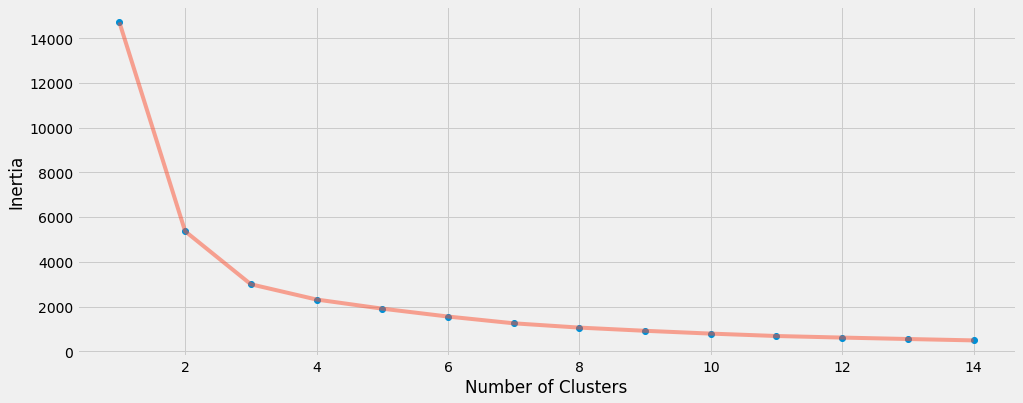

In [ ]:
plt.figure(1 , figsize = (15 ,6))
plt.plot(np.arange(1 , 15) , inertia , 'o')
plt.plot(np.arange(1 , 15) , inertia , '-' , alpha = 0.5)
plt.xlabel('Number of Clusters') , plt.ylabel('Inertia')
plt.show()

#Update K-Means Clustering

In [ ]:
algorithm = (KMeans(n_clusters = 3 ,init='k-means++', n_init = 10 ,max_iter=500, 
                        tol=0.0001,  random_state= 42  , algorithm='elkan') )
algorithm.fit(X1)
labels1 = algorithm.labels_
centroids1 = algorithm.cluster_centers_

In [ ]:
h = 0.02
x_min, x_max = X1[:, 0].min() - 1, X1[:, 0].max() + 1
y_min, y_max = X1[:, 1].min() - 1, X1[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
Z = algorithm.predict(np.c_[xx.ravel(), yy.ravel()]) 

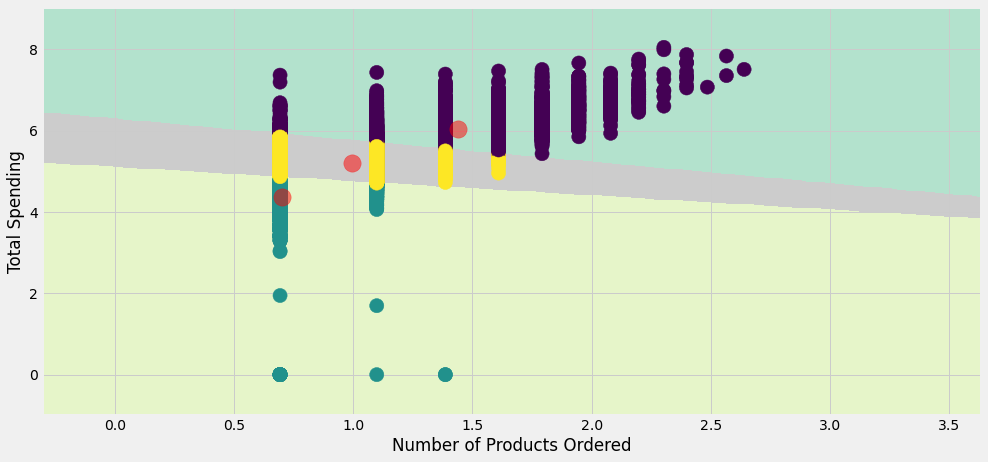

In [ ]:
plt.figure(1 , figsize = (15 , 7) )
plt.clf()
Z = Z.reshape(xx.shape)
plt.imshow(Z , interpolation='nearest', 
           extent=(xx.min(), xx.max(), yy.min(), yy.max()),
           cmap = plt.cm.Pastel2, aspect = 'auto', origin='lower')

plt.scatter( x = 'log_products_ordered' ,y = 'log_total_spending' , data = df , c = labels1 , 
            s = 200 )
plt.scatter(x = centroids1[: , 0] , y =  centroids1[: , 1] , s = 300 , c = 'red' , alpha = 0.5)
plt.ylabel('Total Spending') , plt.xlabel('Number of Products Ordered')
plt.show()

### 2.Segmentation using Product Ordered , Average Return Rate and Total Spending

In [ ]:
X3 = df[['log_products_ordered' , 'log_average_return_rate' , 'log_total_spending']].iloc[: , :].values
inertia = []
for n in range(1 , 15):
    algorithm = (KMeans(n_clusters = n ,init='k-means++', n_init = 10 ,max_iter=500, 
                        tol=0.0001,  random_state= 42  , algorithm='elkan') )
    algorithm.fit(X3)
    inertia.append(algorithm.inertia_)

inertia

[14721.827136750446,
 5378.435726263655,
 3008.2638210734713,
 2325.748840730554,
 1917.6329806099495,
 1561.0278135614699,
 1258.7037123729683,
 1067.543498816663,
 923.5645553953864,
 797.7523352925523,
 689.7753262540225,
 620.3173798863886,
 553.214943596686,
 489.1668807182957]

In [ ]:
# kmeans = KMeans(n_clusters = 4)
# Label = kmeans.fit_predict(X3)
# print(Label)
# print(kmeans.cluster_centers_)

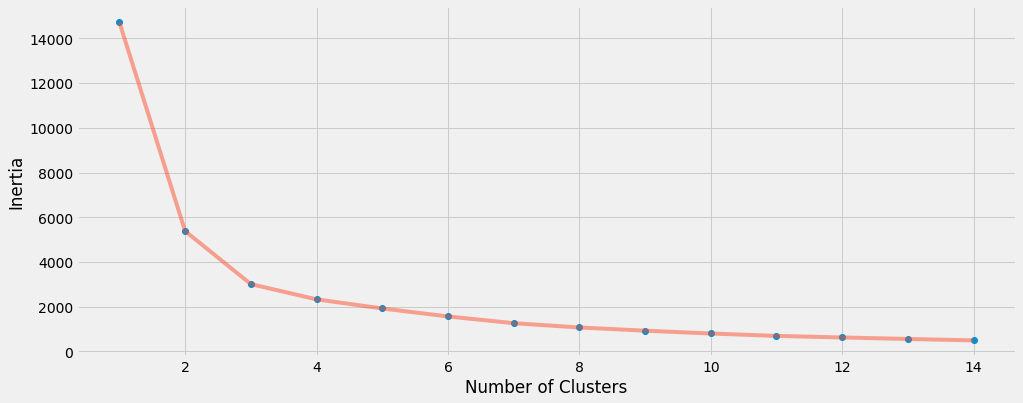

In [ ]:
plt.figure(1 , figsize = (15 ,6))
plt.plot(np.arange(1 , 15) , inertia , 'o')
plt.plot(np.arange(1 , 15) , inertia , '-' , alpha = 0.5)
plt.xlabel('Number of Clusters') , plt.ylabel('Inertia')
plt.show()

In [ ]:
algorithm = (KMeans(n_clusters = 4 ,init='k-means++', n_init = 10 ,max_iter=300, 
                        tol=0.0001,  random_state= 111  , algorithm='elkan') )
algorithm.fit(X3)
labels3 = algorithm.labels_
centroids3 = algorithm.cluster_centers_

In [ ]:
print(centroids3)

[[7.00601007e-01 1.15218211e-03 4.35093589e+00]
 [1.22324947e+00 5.20044802e-04 5.65169596e+00]
 [9.26994039e-01 5.47295737e-04 5.08068731e+00]
 [1.59846518e+00 5.55536094e-04 6.36573629e+00]]


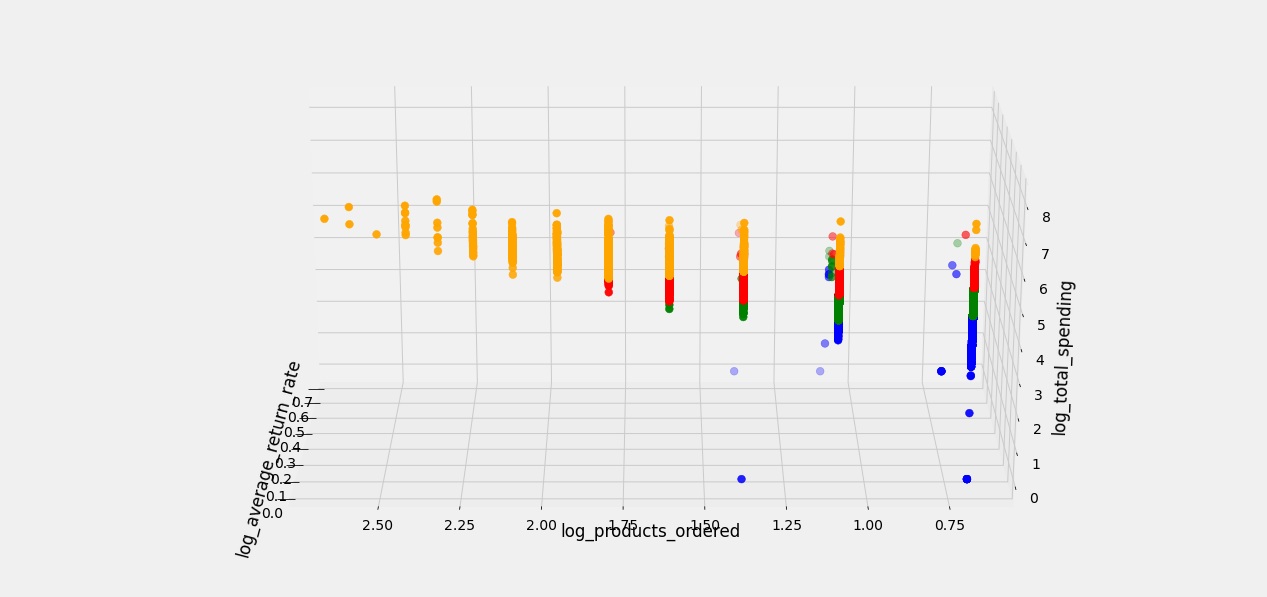

In [ ]:
clusters = algorithm.fit_predict(X3)
df['label']  = clusters

from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(figsize = (20,10))

ax = fig.add_subplot(111,projection = '3d')
ax.scatter(df.log_average_return_rate[df.label==0], df["log_products_ordered"][df.label == 0], df["log_total_spending"][df.label == 0], c='blue',s = 60)
ax.scatter(df.log_average_return_rate[df.label==1], df["log_products_ordered"][df.label == 1], df["log_total_spending"][df.label == 1], c='red',s = 60)
ax.scatter(df.log_average_return_rate[df.label==2], df["log_products_ordered"][df.label == 2], df["log_total_spending"][df.label == 2], c='green',s = 60)
ax.scatter(df.log_average_return_rate[df.label==3], df["log_products_ordered"][df.label == 3], df["log_total_spending"][df.label == 3], c='orange',s = 60)


plt.ylabel("log_products_ordered")
plt.xlabel("log_average_return_rate")
ax.set_zlabel("log_total_spending")
ax.view_init(20,-180)
plt.show()

In [ ]:
df

,Unnamed: 0,customer_id,Gender,products_ordered,average_return_rate,total_spending,log_products_ordered,log_average_return_rate,log_total_spending,label
0,0,1.000661e+06,MALE,1,0.0,260.0,0.693147,0.0,5.564520,1
1,1,1.001914e+06,FEMALE,1,0.0,79.2,0.693147,0.0,4.384524,0
2,2,1.002167e+06,MALE,3,0.0,234.2,1.386294,0.0,5.460436,1
3,3,1.002387e+06,FEMALE,1,0.0,89.0,0.693147,0.0,4.499810,0
4,4,1.002419e+06,FEMALE,2,0.0,103.0,1.098612,0.0,4.644391,2
...,...,...,...,...,...,...,...,...,...,...
24869,24869,9.780500e+13,MALE,2,0.0,259.0,1.098612,0.0,5.560682,1
24870,24870,9.885470e+13,MALE,2,0.0,242.5,1.098612,0.0,5.495117,1
24871,24871,9.897420e+13,MALE,1,0.0,89.0,0.693147,0.0,4.499810,0
24872,24872,9.926270e+13,MALE,2,0.0,267.0,1.098612,0.0,5.590987,1


In [ ]:
cardinality_df = pd.DataFrame(
    df.cluster_name.value_counts().reset_index())

cardinality_df.rename(columns={"index": "Customer Groups",
                               "cluster_name": "Customer Group Magnitude"},
                      inplace=True)

AttributeError: ignored